data.shape(408, 4)


,lvdt,pressure,arduino,position
timestamp,,,,
2023-05-29 14:59:19.444000-07:00,-0.0748,21.6121,0.7962,0.0
2023-05-29 14:59:20.454000-07:00,0.0768,23.2902,0.8692,0.0
2023-05-29 14:59:21.454000-07:00,0.0385,27.1390,0.9506,0.0
2023-05-29 14:59:22.454000-07:00,0.1284,23.2406,0.9859,0.0
2023-05-29 14:59:23.456000-07:00,0.1535,27.3009,0.9326,0.0


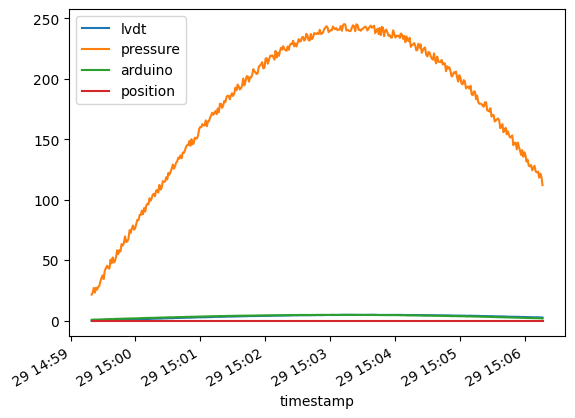

In [22]:
import linecache
import pandas as pd  # https://pandas.pydata.org/pandas-docs/stable/reference/index.html

data_file = "..\\data_log.csv"

sensor_count = int(linecache.getline(data_file, 1).split(',')[-1].strip())
start_timestamp = linecache.getline(data_file, 2).split(',')[-1].strip()

data = pd.read_csv(
    data_file,
    header=3 + sensor_count,
    index_col="timestamp",
    parse_dates=["timestamp"],
)
print(f"data.shape{data.shape}")
display(data.head())
axes = data.plot.line()

In [23]:
sensor_traits = pd.read_csv(
    data_file,
    header=2,
    index_col="name",
    nrows=sensor_count,
)
print(f"sensor_traits.shape{sensor_traits.shape}")
display(sensor_traits)

sensor_traits.shape(4, 6)


,Vex,CF,X0,Units,Sensor,IO Device
name,,,,,,
lvdt,1.0,1.0,-10.0,V,Voltage,9219
pressure,1.0,2.0,0.0,Pa,Pressure,9219
arduino,1.0,0.5,0.0,V,Voltage,9219
position,1.0,1.0,0.0,mm,Encoder,9401


,lvdt (V),pressure (Pa),arduino (V),position (mm)
timestamp,,,,
2023-05-29 14:59:19.444000-07:00,9.9252,10.80605,1.5924,0.0
2023-05-29 14:59:20.454000-07:00,10.0768,11.64510,1.7384,0.0
2023-05-29 14:59:21.454000-07:00,10.0385,13.56950,1.9012,0.0
2023-05-29 14:59:22.454000-07:00,10.1284,11.62030,1.9718,0.0
2023-05-29 14:59:23.456000-07:00,10.1535,13.65045,1.8652,0.0


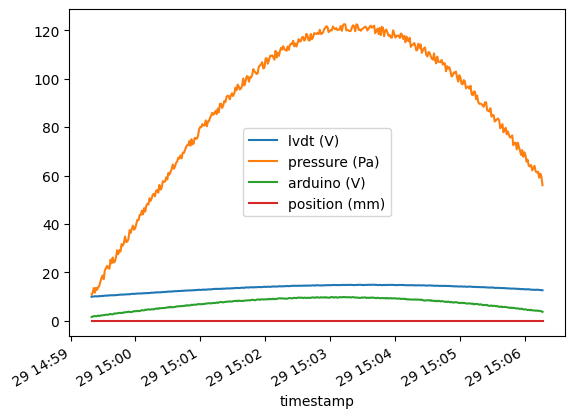

In [24]:
def add_scaled_columns(df, scaling_traits):
    new_df = df.copy()
    for column in new_df:
        name = column
        traits = scaling_traits.loc[name]

        scaled_name = f"{name} ({traits.Units})"
        scaled_data = (new_df[name] - traits.X0) / (traits.Vex * traits.CF)
        new_df[scaled_name] = scaled_data
    return new_df

scaled_data = add_scaled_columns(data, sensor_traits).iloc[:,-sensor_count::]
display(scaled_data.head())
scaled_axes = scaled_data.plot.line()